In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Flatten


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
flat_train_images = train_images.reshape((60000, 784))
flat_train_images = train_images.astype('float32') / 255.0

flat_test_images = test_images.reshape((10000, 784))
flat_test_images = test_images.astype('float32') / 255.0

In [0]:
cat_labels_train = to_categorical(train_labels)
cat_labels_test  = to_categorical(test_labels)

In [0]:
baseline_model = keras.Sequential([keras.layers.Flatten(), keras.layers.Dense(10, activation='softmax')])

baseline_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [0]:
epochs = 10
baseline_history = baseline_model.fit(flat_train_images, 
                      train_labels,
                      epochs=epochs,
                      validation_data=(flat_test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4706 - acc: 0.8762 - val_loss: 0.3065 - val_acc: 0.9149
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3035 - acc: 0.9148 - val_loss: 0.2845 - val_acc: 0.9216
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2829 - acc: 0.9208 - val_loss: 0.2779 - val_acc: 0.9229
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2728 - acc: 0.9238 - val_loss: 0.2667 - val_acc: 0.9262
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2666 - acc: 0.9265 - val_loss: 0.2655 - val_acc: 0.9248
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2620 - acc: 0.9266 - val_loss: 0.2697 - val_acc: 0.9234
Epoch 7/10
60000/60000 [=====

In [0]:
def getWidthAndHeight(image):
  temp_left_right = [28,0]
  temp_top_bottom = [28,0]
  rowAverage = []
  rowSum = 0
  threshold = 10
  for i in range(28):
    for j in range(28):
      pixel = image[i][j]
      rowSum += pixel
      if(pixel > threshold and j<temp_left_right[0]):
        temp_left_right[0] = j
      if(pixel > threshold and j>temp_left_right[1]):
        temp_left_right[1] = j
      if(pixel > threshold and i<temp_top_bottom[0]):
        temp_top_bottom[0] = i
      if(pixel > threshold and i>temp_top_bottom[1]):
        temp_top_bottom[1] = i
    rowAverage.append(rowSum/28)
  return [temp_left_right[1]-temp_left_right[0]+1, temp_top_bottom[1]-temp_top_bottom[0]+1, rowAverage]


In [0]:
handcrafted = 60000*[0]
test_handcrafted = 10000*[0]
for i in range(60000):
  result = getWidthAndHeight(train_images[i])
  handcrafted[i] = np.concatenate((flat_train_images[i].flatten(),[result[0]],[result[1]]))
for i in range(10000):
  result = getWidthAndHeight(test_images[i])
  test_handcrafted[i] = np.concatenate((flat_test_images[i].flatten(),[result[0]],[result[1]]))

In [0]:
handcrafted_model = keras.Sequential([keras.layers.Dense(10,activation='softmax')])

handcrafted_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
handcrafted_history = handcrafted_model.fit(np.array(handcrafted), 
                      train_labels,
                      epochs=epochs,
                      validation_data=(np.array(test_handcrafted), test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4653 - acc: 0.8764 - val_loss: 0.2951 - val_acc: 0.9167
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2874 - acc: 0.9173 - val_loss: 0.2643 - val_acc: 0.9245
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2656 - acc: 0.9234 - val_loss: 0.2576 - val_acc: 0.9254
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2542 - acc: 0.9272 - val_loss: 0.2482 - val_acc: 0.9292
Epoch 5/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2481 - acc: 0.9281 - val_loss: 0.2484 - val_acc: 0.9310
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2431 - acc: 0.9309 - val_loss: 0.2440 - val_acc: 0.9298
Epoch 7/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2399 - acc: 0.9313 - val_loss: 0.

In [0]:
test_reg_loss, test_reg_acc = baseline_model.evaluate(test_images, test_labels)
test_hand_loss, test_hand_acc = handcrafted_model.evaluate(np.array(test_handcrafted), test_labels)

print('Baseline Model: Test accuracy:', test_reg_acc*100)
print('Handcrafted Model: Test accuracy:', test_hand_acc*100,'\n\n')
print('Baseline Model: Test loss:', test_reg_loss)
print('Handcrafted Model: Test loss:', test_hand_loss)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.2462 - acc: 0.9302
Baseline Model: Test accuracy: 90.21000266075134
Handcrafted Model: Test accuracy: 93.01999807357788 


Baseline Model: Test loss: 55.25483209174876
Handcrafted Model: Test loss: 0.2462131072342396


In [0]:
history_reg_dict = baseline_history.history
loss_reg_values = history_reg_dict['loss']
test_reg_loss_values = history_reg_dict['val_loss']
epochs_reg_range = range(1, epochs+1)

history_hand_dict = handcrafted_history.history
loss_hand_values = history_hand_dict['loss']
test_hand_loss_values = history_hand_dict['val_loss']
epochs_hand_range = range(1, epochs+1)



modelHistory = [[history_reg_dict, loss_reg_values, test_reg_loss_values, epochs_hand_range],
                [history_hand_dict, loss_hand_values, test_hand_loss_values, epochs_hand_range]]

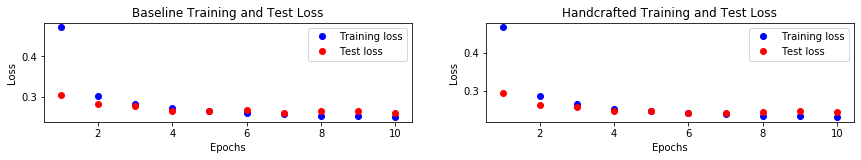

In [0]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 3):
    plt.subplot(2, 2, i)
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][1], 'bo', label='Training loss')
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][2], 'ro', label='Test loss')
    if(i==1):
      plt.title('Baseline Training and Test Loss')
    elif(i==2):
      plt.title('Handcrafted Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

In [0]:
acc_reg_values = history_reg_dict['acc']
test_acc_reg_values = history_reg_dict['val_acc']

acc_hand_values = history_hand_dict['acc']
test_acc_hand_values = history_hand_dict['val_acc']

accHistory = [[acc_reg_values, test_acc_reg_values],
              [acc_hand_values, test_acc_hand_values]]

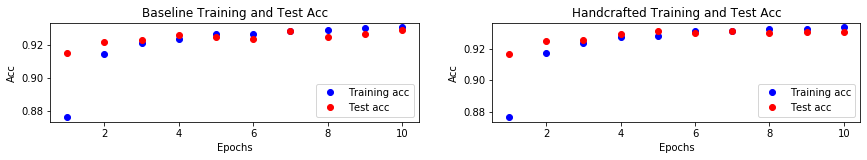

In [0]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 3):
    plt.subplot(2, 2, i)
    plt.plot(modelHistory[i-1][3], accHistory[i-1][0], 'bo', label='Training acc')
    plt.plot(modelHistory[i-1][3], accHistory[i-1][1], 'ro', label='Test acc')
    if(i==1):
      plt.title('Baseline Training and Test Acc')
    elif(i==2):
      plt.title('Handcrafted Training and Test Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()